# Prophet Exercise

### 1. Data preparation

**TASK: Load a time series dataset into a pandas DataFrame. This could be any time series data of your choice, such as historical stock prices, weather data, or website traffic data. The data should have at least one seasonality and trend to make the exercise meaningful.**

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
tickerSymbol = 'DBK.DE' # Deutsche Bank

tickerData = yf.Ticker(tickerSymbol)

tickerDf = tickerData.history(period='1d', start='2006-1-1', end='2012-12-31') # historical prices

print(tickerDf)

                                Open       High        Low      Close  \
Date                                                                    
2006-01-02 00:00:00+01:00  41.621626  41.875418  41.342455  41.586094   
2006-01-03 00:00:00+01:00  41.692689  41.895720  41.200336  41.489655   
2006-01-04 00:00:00+01:00  42.093683  42.459144  41.748529  42.367779   
2006-01-05 00:00:00+01:00  42.129202  42.382992  41.987079  42.382992   
2006-01-06 00:00:00+01:00  42.459134  42.794138  42.459134  42.758606   
...                              ...        ...        ...        ...   
2012-12-19 00:00:00+01:00  24.107451  24.562649  24.009908  24.349501   
2012-12-20 00:00:00+01:00  24.212219  24.306150  24.064100  24.230282   
2012-12-21 00:00:00+01:00  24.024360  24.078551  23.457168  23.840113   
2012-12-27 00:00:00+01:00  23.858176  24.407304  23.858176  24.035198   
2012-12-28 00:00:00+01:00  23.984619  24.089386  23.626962  23.807598   

                             Volume  Dividends  St

### 2. Exploratory Data Analysis (EDA)

**TASK: Plot the time series data and manually identify any visible trends, seasonality, or other interesting patterns. Use various pandas functions to understand the data better.**

In [4]:
tickerDf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1780 entries, 2006-01-02 00:00:00+01:00 to 2012-12-28 00:00:00+01:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1780 non-null   float64
 1   High          1780 non-null   float64
 2   Low           1780 non-null   float64
 3   Close         1780 non-null   float64
 4   Volume        1780 non-null   int64  
 5   Dividends     1780 non-null   float64
 6   Stock Splits  1780 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 111.2 KB


In [5]:
tickerDf.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,1780.000000,1780.000000,1780.000000,1780.000000,1.780000e+03,1780.000000,1780.0
mean,34.057488,34.514010,33.535403,34.033716,9.052180e+06,0.007756,0.0
std,12.551234,12.542399,12.555553,12.564374,5.166448e+06,0.129471,0.0
min,10.001636,10.822443,9.351073,10.260040,0.000000e+00,0.000000,0.0
25%,24.573999,24.988642,24.028743,24.539905,5.644610e+06,0.000000,0.0
50%,30.620458,31.029256,30.076018,30.550631,7.771512e+06,0.000000,0.0
75%,45.691135,46.354406,45.187659,45.721254,1.082463e+07,0.000000,0.0
max,62.667222,63.079671,62.113523,62.513535,5.317023e+07,3.495383,0.0


In [6]:
tickerDf.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2006-01-02 00:00:00+01:00,41.621626,41.875418,41.342455,41.586094,1523957,0.0,0.0
2006-01-03 00:00:00+01:00,41.692689,41.895720,41.200336,41.489655,4533188,0.0,0.0
2006-01-04 00:00:00+01:00,42.093683,42.459144,41.748529,42.367779,5303195,0.0,0.0
2006-01-05 00:00:00+01:00,42.129202,42.382992,41.987079,42.382992,3648365,0.0,0.0
2006-01-06 00:00:00+01:00,42.459134,42.794138,42.459134,42.758606,3943927,0.0,0.0


Text(0.5, 1.0, 'Stock Prices over Time')

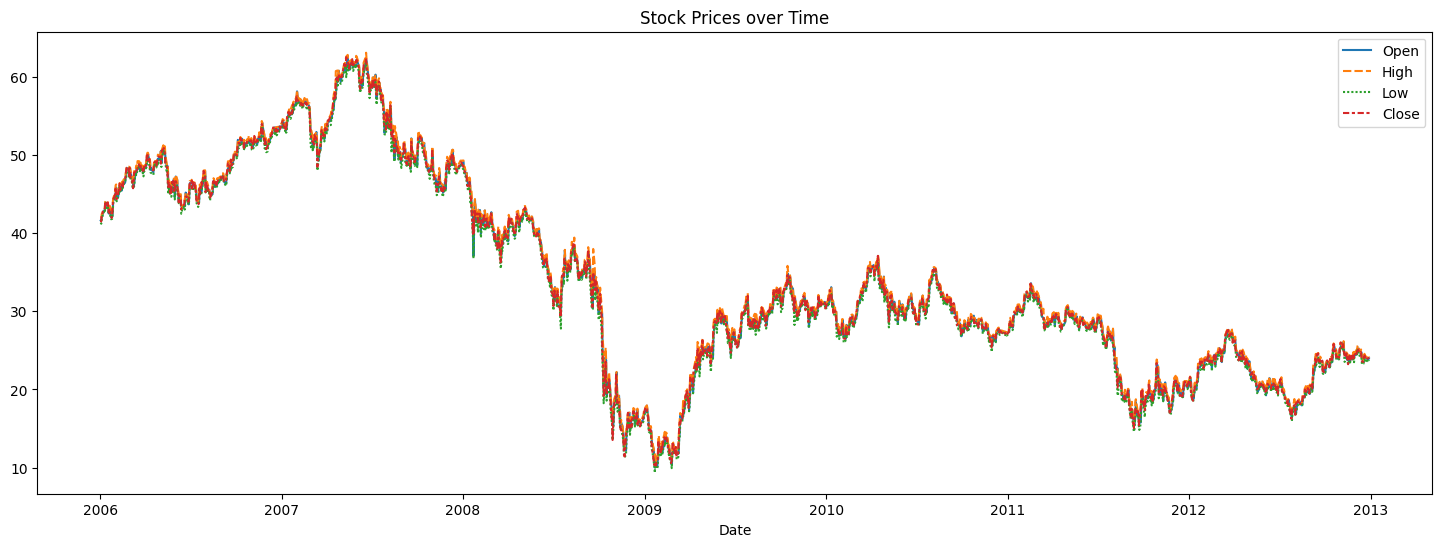

In [7]:
plt.figure(figsize=(18, 6))
sns.lineplot(data=tickerDf[['Open', 'High', 'Low', 'Close']])
plt.title('Stock Prices over Time')

Text(0.5, 1.0, 'Distribution of Returns')

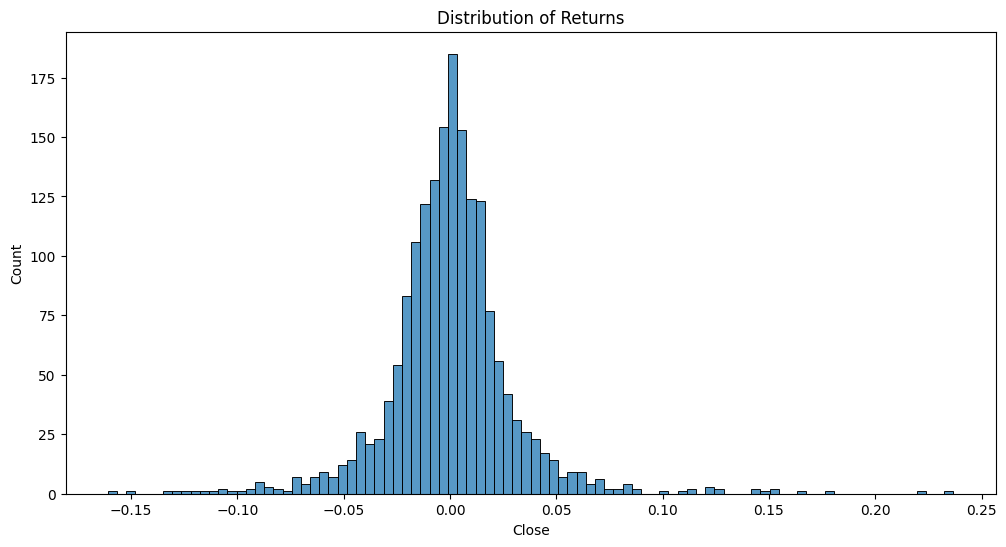

In [8]:
returns = tickerDf['Close'].pct_change().dropna()
plt.figure(figsize=(12, 6))
sns.histplot(returns)
plt.title('Distribution of Returns')

Text(0.5, 1.0, 'Correlation Heatmap')

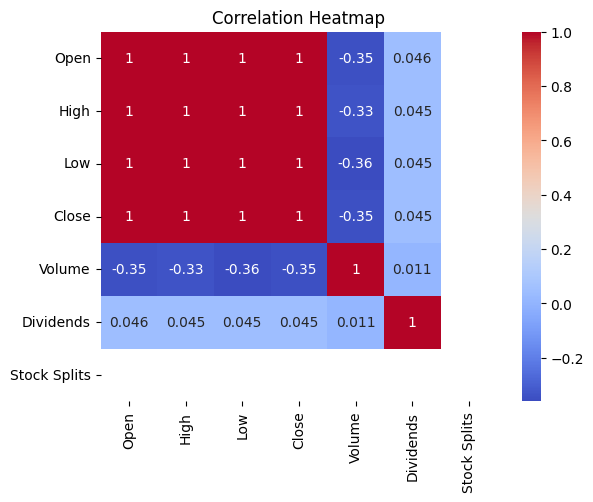

In [9]:
sns.heatmap(tickerDf.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

Text(0.5, 1.0, 'Box Plot of Stock Prices')

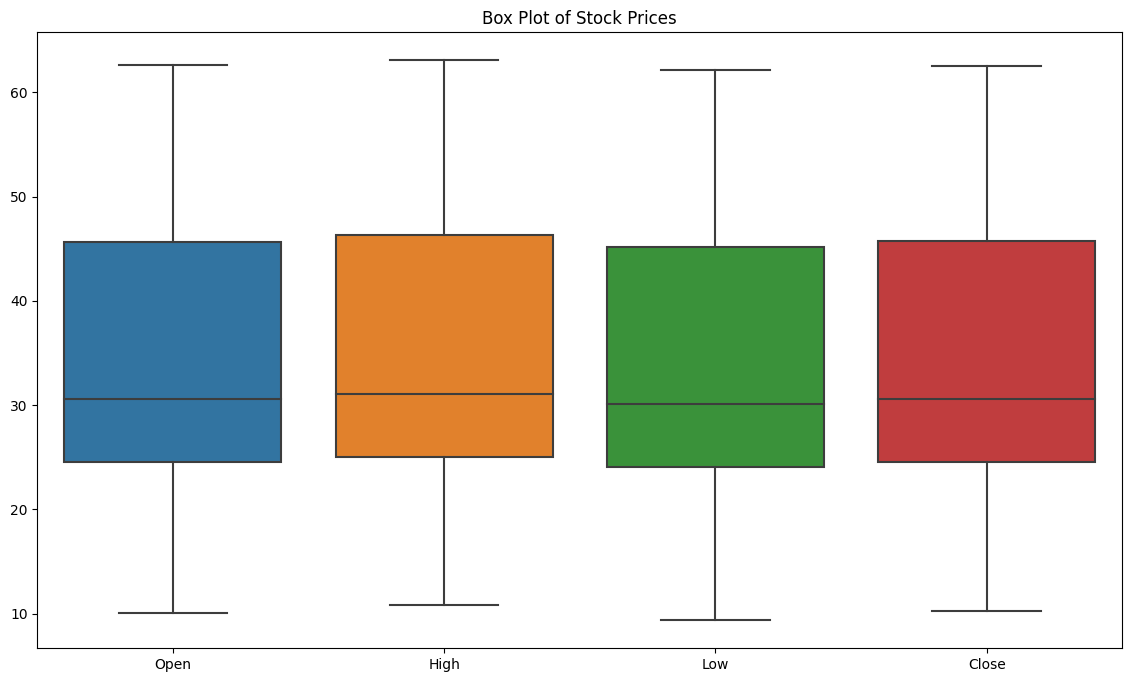

In [10]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=tickerDf[['Open', 'High', 'Low', 'Close']])
plt.title('Box Plot of Stock Prices')

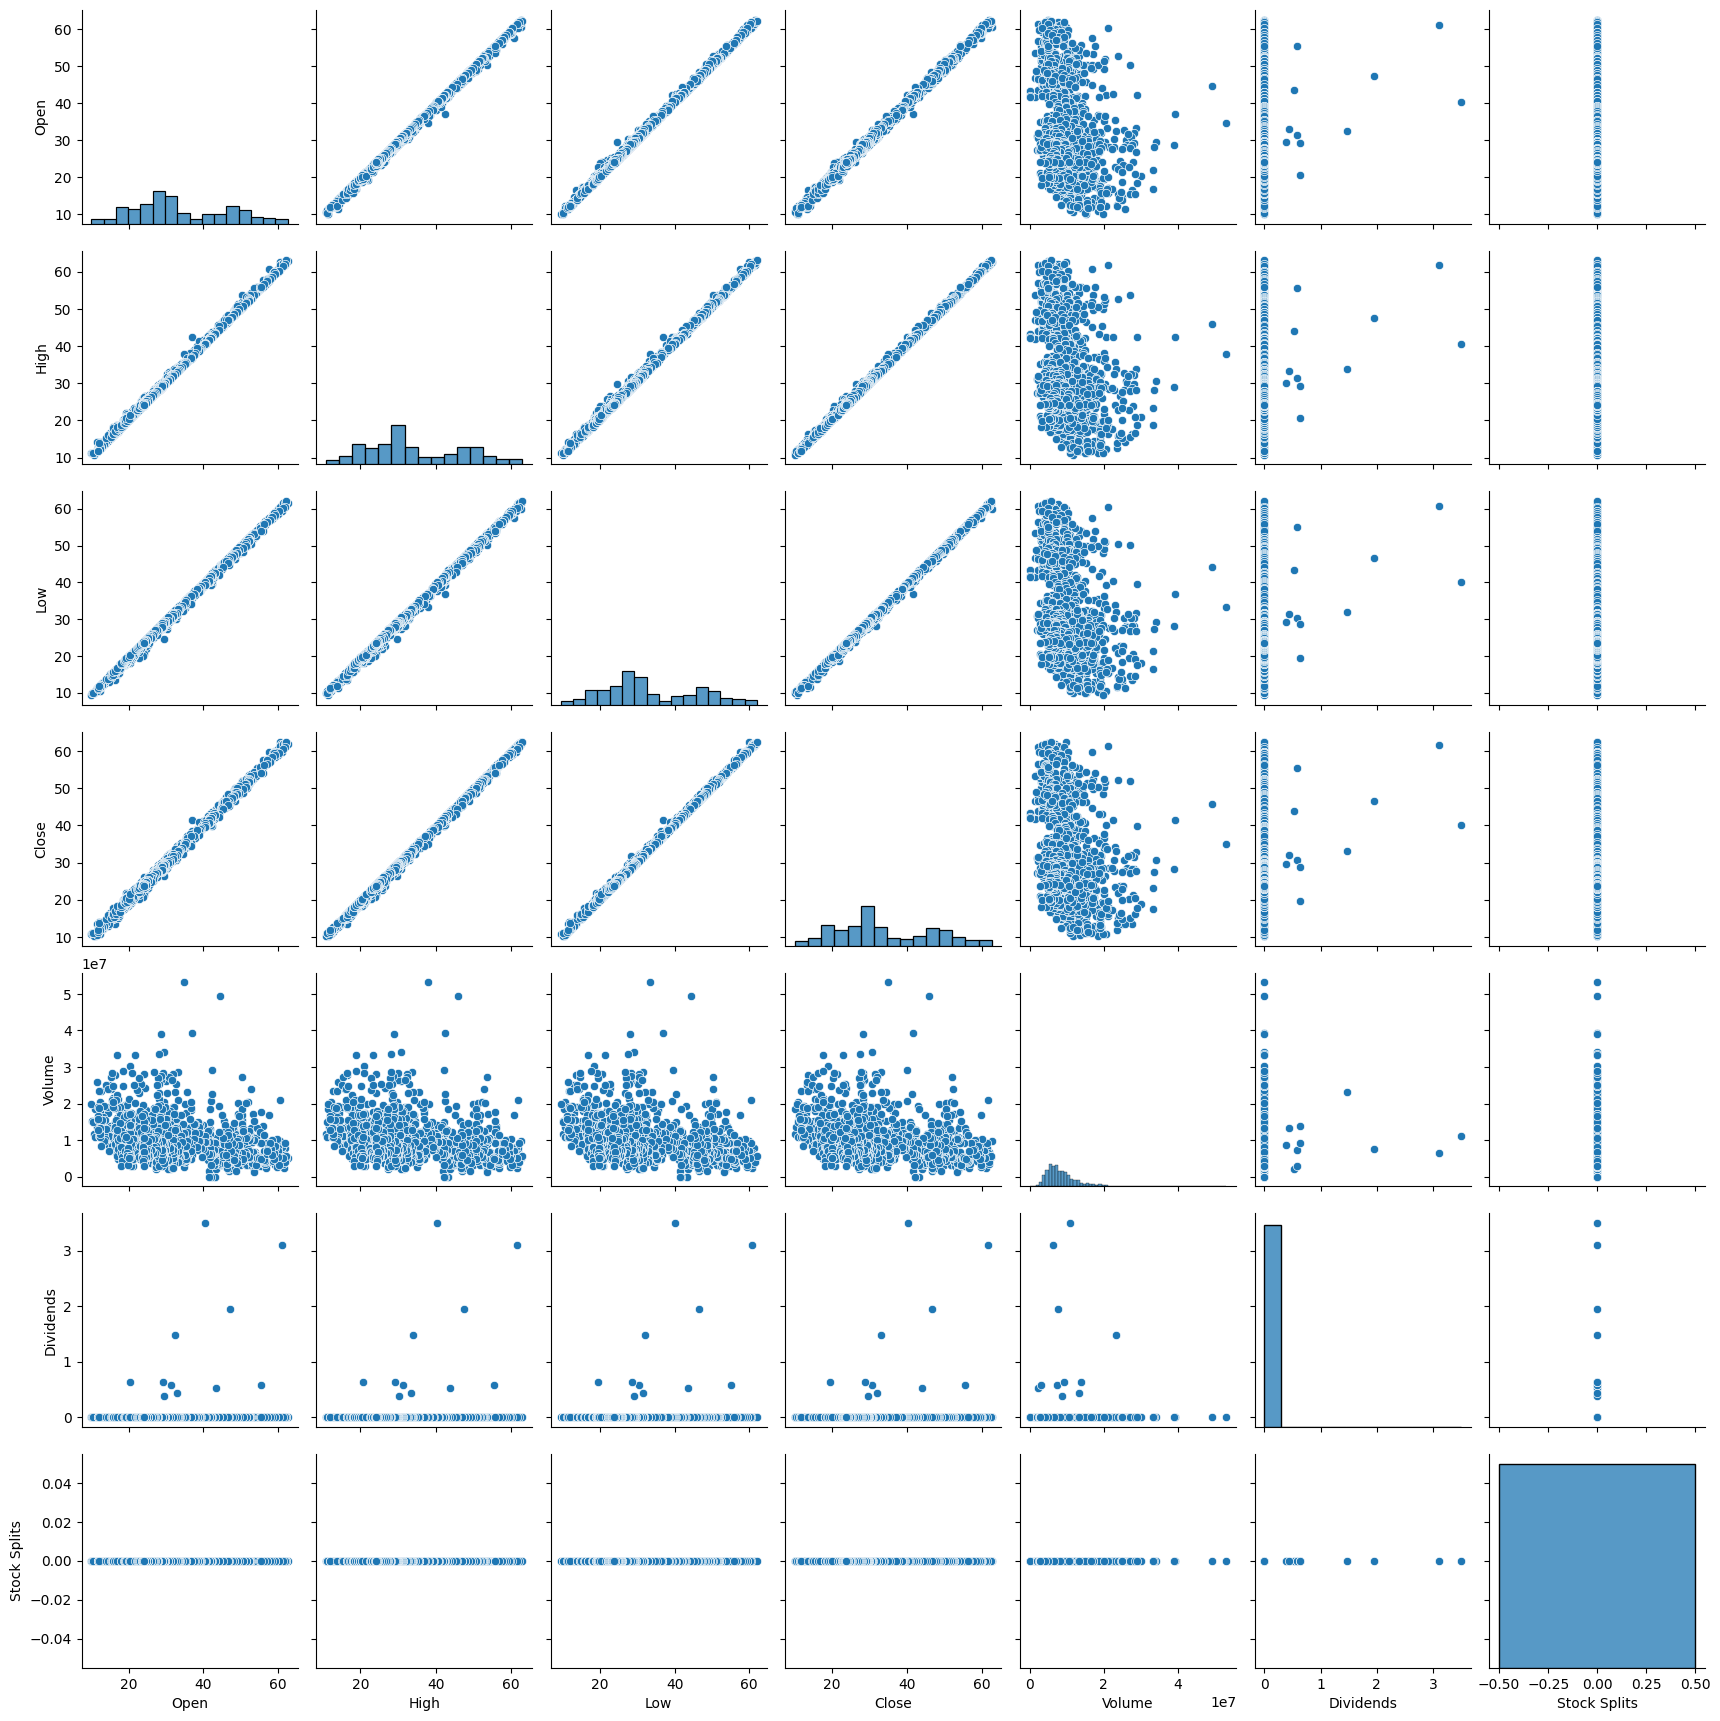

In [11]:
sns.pairplot(tickerDf)

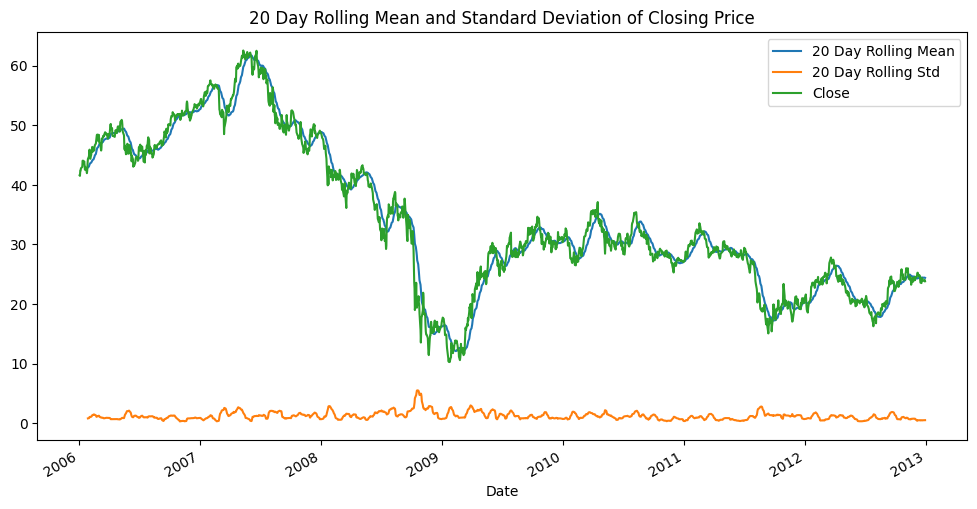

In [12]:
plt.figure(figsize=(12, 6))
tickerDf['Close'].rolling(window=20).mean().plot(label='20 Day Rolling Mean')
tickerDf['Close'].rolling(window=20).std().plot(label='20 Day Rolling Std')
tickerDf['Close'].plot(label='Close')
plt.legend()
plt.title('20 Day Rolling Mean and Standard Deviation of Closing Price');

Text(0.5, 1.0, 'Violin Plot of Trading Volume')

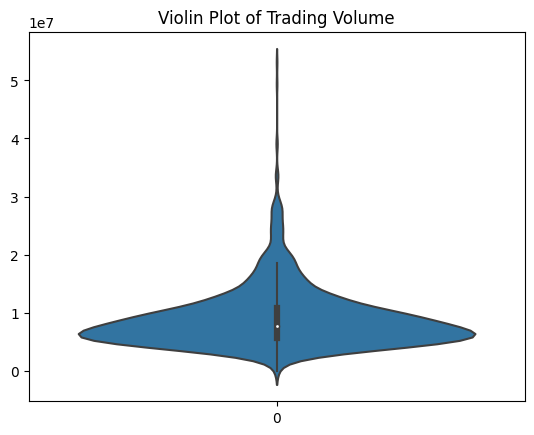

In [13]:
sns.violinplot(data=tickerDf['Volume'])
plt.title('Violin Plot of Trading Volume')

In [14]:
import plotly.graph_objects as go

df = tickerDf.reset_index()
fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])
fig.show()

### 3. Preprocessing

**TASK: Prepare the data for Prophet. Rename the columns to 'ds' and 'y' and convert 'ds' to datetime format if it isn't already.**

In [15]:

df_close = tickerDf.reset_index()[['Date', 'Close']]
df_close.columns = ['ds', 'y']

df = df_close
df['ds'] = pd.to_datetime(df['ds']).dt.tz_localize(None)

In [16]:
df.head(12)

,ds,y
0,2006-01-02,41.586094
1,2006-01-03,41.489655
2,2006-01-04,42.367779
3,2006-01-05,42.382992
4,2006-01-06,42.758606
5,2006-01-09,42.915955
6,2006-01-10,42.992096
7,2006-01-11,44.012337
8,2006-01-12,44.047867
9,2006-01-13,43.469219


### 4. Model training

**TASK: Create and fit a Prophet model to the data. Start with the default parameters.**

In [17]:
from prophet import Prophet

model = Prophet()
model.fit(df)

17:39:30 - cmdstanpy - INFO - Chain [1] start processing
17:39:30 - cmdstanpy - INFO - Chain [1] done processing


### 5. Forecasting

**TASK: Make a future DataFrame for a certain period, and use the model to make a forecast. Plot the forecast.**

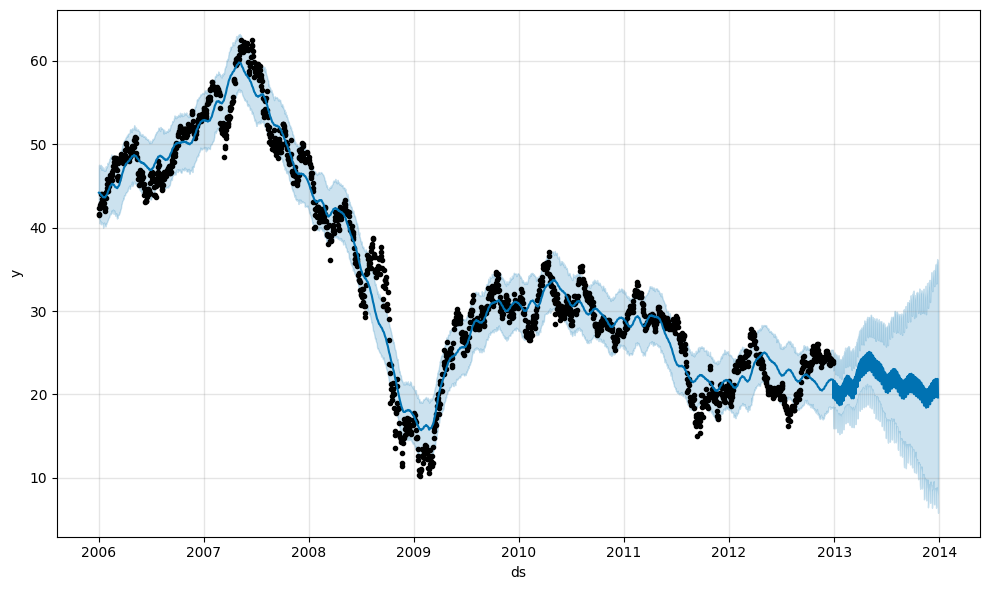

In [18]:
future = model.make_future_dataframe(periods=365)

forecast = model.predict(future)

model.plot(forecast);

### 6. Adding Change Points

**TASK: Add change points to the model to allow the trend to change at these points. Visualize the change points.**

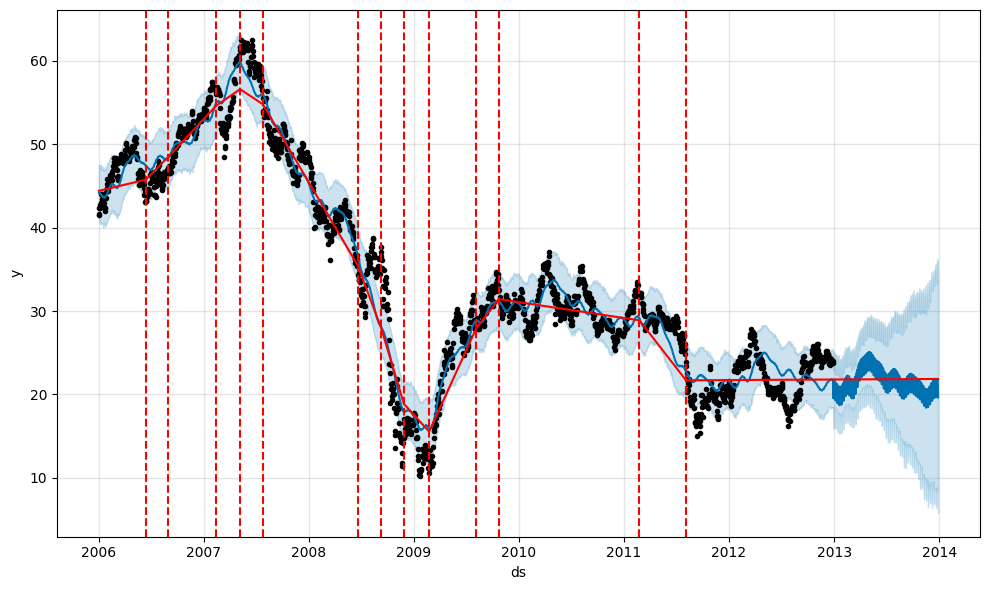

In [19]:
from prophet.plot import add_changepoints_to_plot

fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)

### 7. Check Seasonalities

**TASK: If the dataset has known seasonalities that are not automatically detected by Prophet, add these seasonalities manually.**

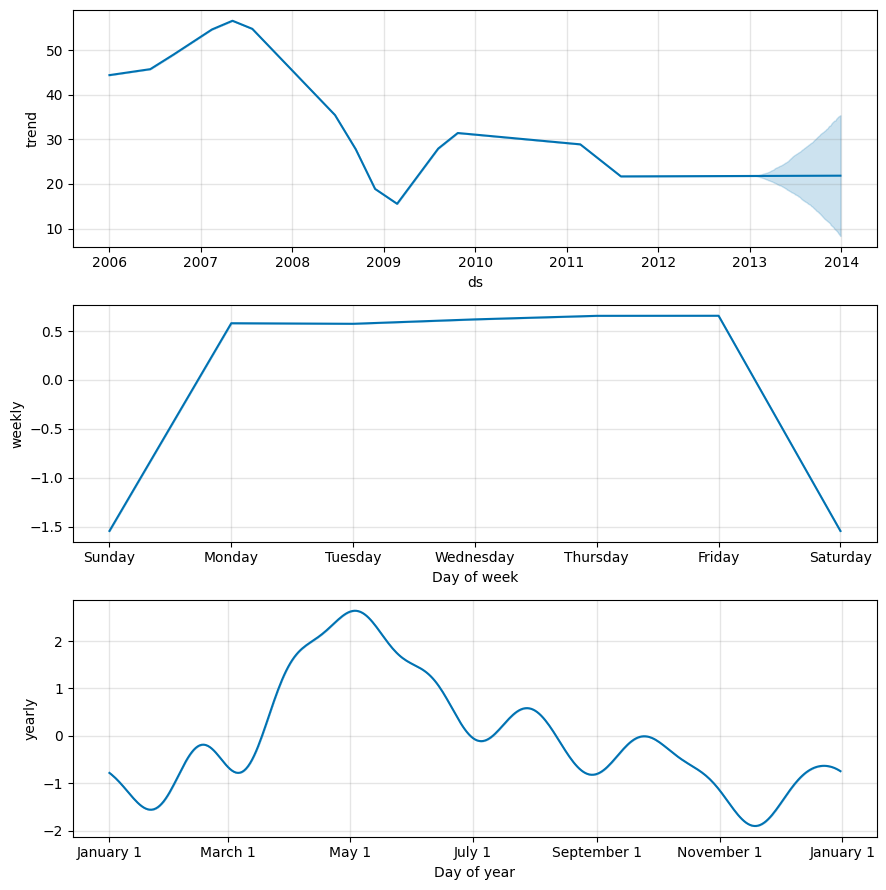

In [20]:
model.plot_components(forecast);

### 8. Model Tuning

**TASK: Tune the model's parameters to improve the forecast. This could include changing the seasonality mode, changing the number of Fourier terms for seasonalities, or adding holidays.**

In [21]:
model = Prophet(weekly_seasonality=True)
model.add_seasonality(name='weekly', period=5, fourier_order=3)

In [22]:
import pandas_market_calendars as mcal

nyse = mcal.get_calendar('NYSE')
market_holidays = nyse.holidays().holidays

holidays = pd.DataFrame({
  'holiday': 'USMarketHoliday',
  'ds': pd.to_datetime(market_holidays),
  'lower_window': 0,
  'upper_window': 1,
})

model = Prophet(holidays=holidays)

model.fit(df)

17:39:34 - cmdstanpy - INFO - Chain [1] start processing
17:39:34 - cmdstanpy - INFO - Chain [1] done processing


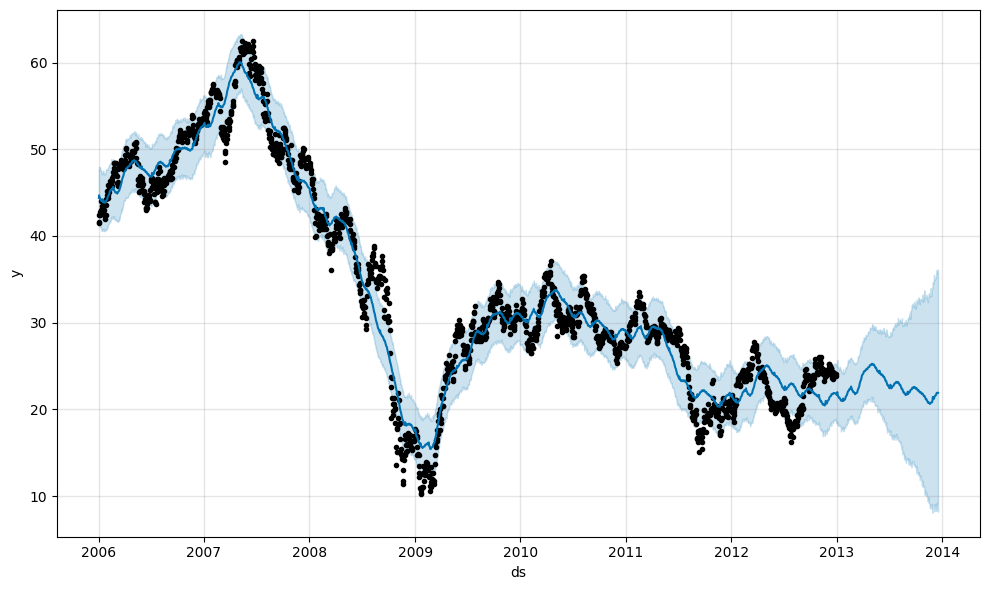

In [23]:
future = model.make_future_dataframe(periods=252, freq='B')

forecast = model.predict(future)

model.plot(forecast);

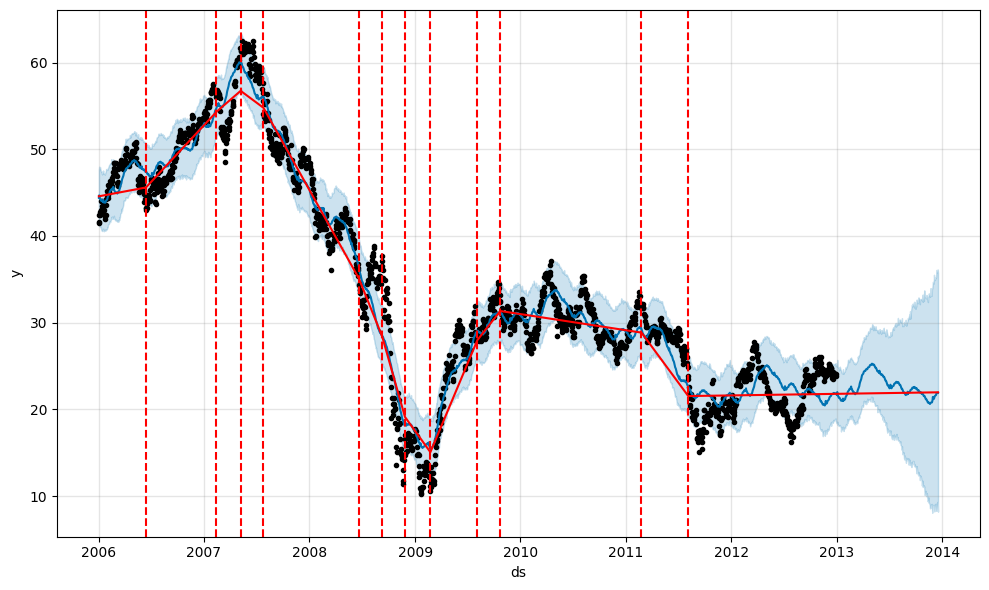

In [24]:
fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast);

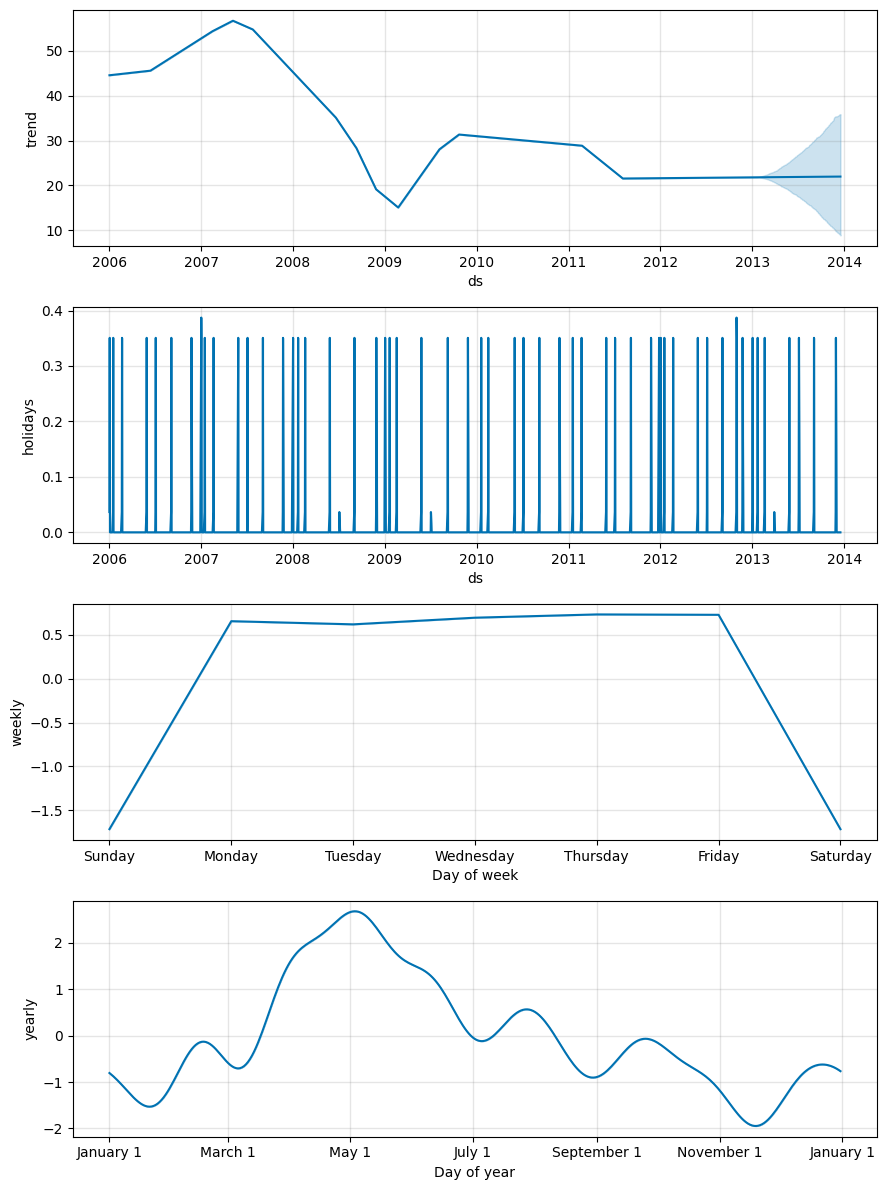

In [25]:
model.plot_components(forecast);

### 9. Cross-Validation

**TASK: Use Prophet's built-in cross-validation to assess the model's performance. Compute and discuss various error metrics.**

In [26]:
from prophet.diagnostics import cross_validation, performance_metrics

df_cv = cross_validation(model, initial='730 days', period='180 days', horizon='365 days')

  0%|          | 0/9 [00:00<?, ?it/s]

17:39:39 - cmdstanpy - INFO - Chain [1] start processing
17:39:39 - cmdstanpy - INFO - Chain [1] done processing
17:39:41 - cmdstanpy - INFO - Chain [1] start processing
17:39:42 - cmdstanpy - INFO - Chain [1] done processing
17:39:44 - cmdstanpy - INFO - Chain [1] start processing
17:39:44 - cmdstanpy - INFO - Chain [1] done processing
17:39:46 - cmdstanpy - INFO - Chain [1] start processing
17:39:46 - cmdstanpy - INFO - Chain [1] done processing
17:39:48 - cmdstanpy - INFO - Chain [1] start processing
17:39:48 - cmdstanpy - INFO - Chain [1] done processing
17:39:50 - cmdstanpy - INFO - Chain [1] start processing
17:39:50 - cmdstanpy - INFO - Chain [1] done processing
17:39:52 - cmdstanpy - INFO - Chain [1] start processing
17:39:53 - cmdstanpy - INFO - Chain [1] done processing
17:39:55 - cmdstanpy - INFO - Chain [1] start processing
17:39:55 - cmdstanpy - INFO - Chain [1] done processing
17:39:57 - cmdstanpy - INFO - Chain [1] start processing
17:39:57 - cmdstanpy - INFO - Chain [1]

In [27]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2008-01-21,46.646378,45.244892,47.872483,39.903061,2008-01-19
1,2008-01-22,46.517185,45.096950,47.867103,41.495010,2008-01-19
2,2008-01-23,46.184882,44.868685,47.475493,40.034821,2008-01-19
3,2008-01-24,46.166832,44.852105,47.539974,43.081470,2008-01-19
4,2008-01-25,46.199765,44.930519,47.570038,42.214142,2008-01-19


In [28]:
df_p = performance_metrics(df_cv)

In [29]:
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,36 days,20.982993,4.580720,3.838646,0.131483,0.123592,0.134283,0.378457
1,37 days,21.309349,4.616205,3.890859,0.133415,0.123606,0.136174,0.365357
2,38 days,21.811682,4.670298,3.940432,0.135546,0.124062,0.137996,0.356623
3,39 days,22.813416,4.776339,4.043913,0.139650,0.127201,0.141935,0.341859
4,40 days,23.723432,4.870671,4.137071,0.143465,0.127933,0.145602,0.333125


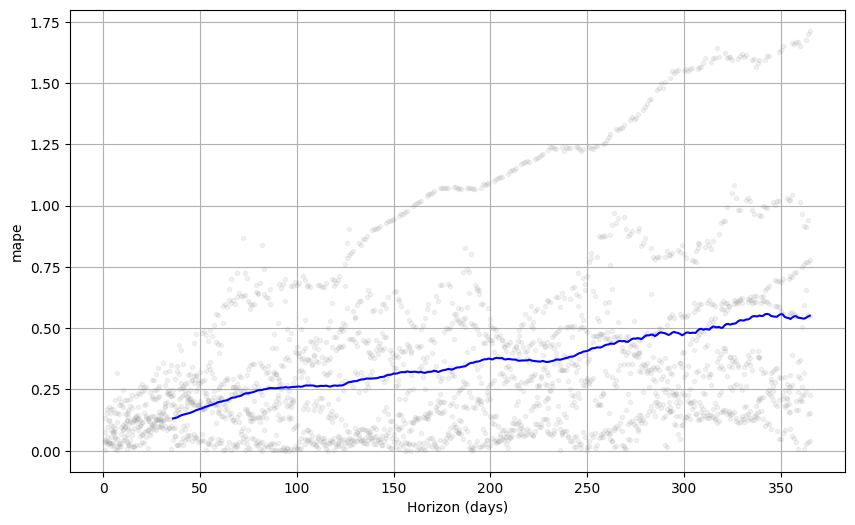

In [30]:
from prophet.plot import plot_cross_validation_metric

plot_cross_validation_metric(df_cv, metric='mape');

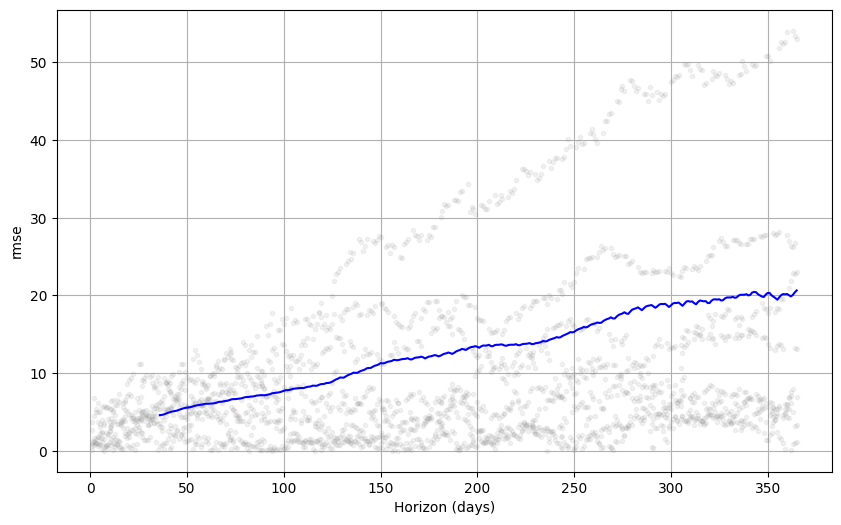

In [31]:
plot_cross_validation_metric(df_cv, metric='rmse');

In [32]:
# EXTRA: parse only business days for cross validation and performance metrics
from pandas.tseries.offsets import BDay
from pandas.tseries.holiday import USFederalHolidayCalendar

bday_us = pd.offsets.CustomBusinessDay(calendar=USFederalHolidayCalendar())

df = df[df['ds'].dt.date.astype('str').isin(pd.date_range(start='2006-01-01', end='2012-12-31', freq=bday_us).date.astype('str'))]

df_cv = cross_validation(model, initial='730 days', period='180 days', horizon='365 days')

  0%|          | 0/9 [00:00<?, ?it/s]

17:40:01 - cmdstanpy - INFO - Chain [1] start processing
17:40:01 - cmdstanpy - INFO - Chain [1] done processing
17:40:03 - cmdstanpy - INFO - Chain [1] start processing
17:40:03 - cmdstanpy - INFO - Chain [1] done processing
17:40:05 - cmdstanpy - INFO - Chain [1] start processing
17:40:05 - cmdstanpy - INFO - Chain [1] done processing
17:40:07 - cmdstanpy - INFO - Chain [1] start processing
17:40:08 - cmdstanpy - INFO - Chain [1] done processing
17:40:10 - cmdstanpy - INFO - Chain [1] start processing
17:40:10 - cmdstanpy - INFO - Chain [1] done processing
17:40:12 - cmdstanpy - INFO - Chain [1] start processing
17:40:12 - cmdstanpy - INFO - Chain [1] done processing
17:40:14 - cmdstanpy - INFO - Chain [1] start processing
17:40:14 - cmdstanpy - INFO - Chain [1] done processing
17:40:16 - cmdstanpy - INFO - Chain [1] start processing
17:40:17 - cmdstanpy - INFO - Chain [1] done processing
17:40:19 - cmdstanpy - INFO - Chain [1] start processing
17:40:19 - cmdstanpy - INFO - Chain [1]

In [33]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2008-01-21,46.646378,45.298237,47.925028,39.903061,2008-01-19
1,2008-01-22,46.517185,45.066912,47.877747,41.495010,2008-01-19
2,2008-01-23,46.184882,44.807179,47.512772,40.034821,2008-01-19
3,2008-01-24,46.166832,44.854290,47.517822,43.081470,2008-01-19
4,2008-01-25,46.199765,44.747515,47.625400,42.214142,2008-01-19


In [34]:
df_p = performance_metrics(df_cv)

In [35]:
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,36 days,20.982993,4.580720,3.838646,0.131483,0.123592,0.134283,0.382824
1,37 days,21.309349,4.616205,3.890859,0.133415,0.123606,0.136174,0.369723
2,38 days,21.811682,4.670298,3.940432,0.135546,0.124062,0.137996,0.360990
3,39 days,22.813416,4.776339,4.043913,0.139650,0.127201,0.141935,0.346226
4,40 days,23.723432,4.870671,4.137071,0.143465,0.127933,0.145602,0.337492


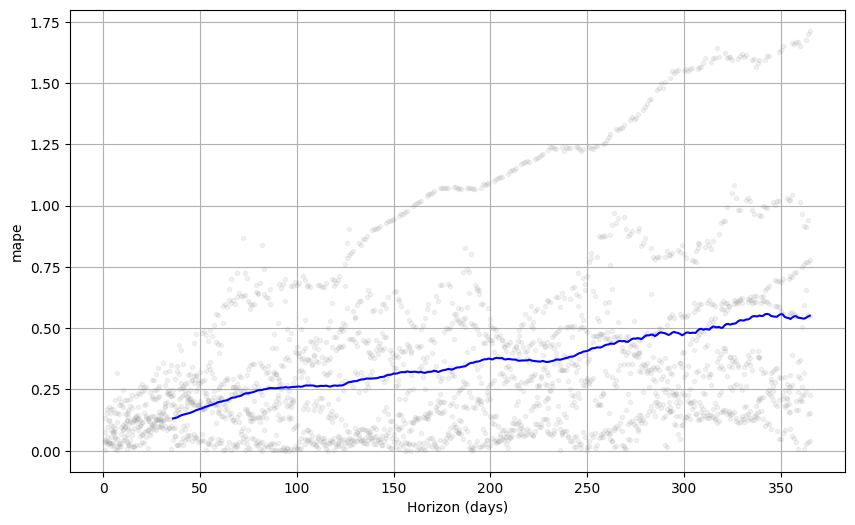

In [36]:
plot_cross_validation_metric(df_cv, metric='mape');

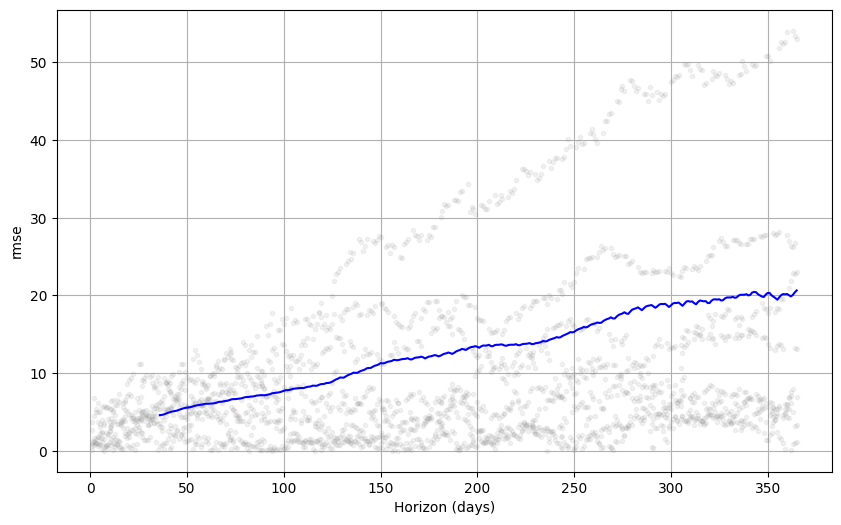

In [37]:
plot_cross_validation_metric(df_cv, metric='rmse');